In [2]:
import pandas as pd
import sqlite3
import math
import datetime 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

In [3]:
conn = sqlite3.connect('database.db')

In [4]:
c = conn.cursor()

# Desain Database Datawarehouse

<img src ="snowflake.png"/>

In [5]:
c.executescript('drop table if exists kota')
c.executescript('drop table if exists customer')
c.executescript('drop table if exists produk')
c.executescript('drop table if exists penjualan')
c.execute("CREATE TABLE IF NOT EXISTS 'kota' ('id' INT, 'nama_kota' VARCHAR(255) NULL, PRIMARY KEY ('id'))")
c.execute("CREATE TABLE IF NOT EXISTS 'customer' ('id' INT, 'nama_customer' VARCHAR(255) NULL, 'kota_id' INT NOT NULL, PRIMARY KEY ('id'), FOREIGN KEY ('kota_id') REFERENCES 'kota' ('id') ON DELETE NO ACTION ON UPDATE NO ACTION)")
c.execute("CREATE TABLE IF NOT EXISTS 'produk' ( 'id' INT, 'nama_produk' VARCHAR(255) NULL, 'harga_produk' FLOAT NULL, PRIMARY KEY ('id'))")
c.execute("CREATE TABLE IF NOT EXISTS 'penjualan' ( 'id', 'tanggal_penjualan' DATE NULL, 'jumlah_beli' INT NULL, 'customer_id' INT NOT NULL,'produk_id' INT NOT NULL, PRIMARY KEY ('id'), FOREIGN KEY ('customer_id') REFERENCES 'customer' ('id') ON DELETE NO ACTION ON UPDATE NO ACTION, FOREIGN KEY ('produk_id') REFERENCES 'produk' ('id') ON DELETE NO ACTION ON UPDATE NO ACTION)")

In [6]:
df = pd.read_csv("Penjualan.csv")
df

,Nota,Produk,Customer,Kota,Harga Jual,Jumlah Pembelian,Tanggal Pembelian,Total Penjualan
0,1,JAKET,Budi,Surabaya,"Rp 250,000",10,4/2/2019,"Rp 2,500,000"
1,2,KEMEJA FLANEL BENHILL,Santoso,Surabaya,"Rp 300,000",23,4/3/2019,"Rp 6,900,000"
2,3,CELANA CHINOS EMBA,Ita,Surabaya,"Rp 267,000",22,4/4/2019,"Rp 5,874,000"
3,4,KAOS 3SECOND,Erni,Surabaya,"Rp 150,000",13,4/5/2019,"Rp 1,950,000"
4,5,CELANA PENDEK NEVADA KNIT BASIC,Jipa,Surabaya,"Rp 199,000",5,4/6/2019,"Rp 995,000"
...,...,...,...,...,...,...,...,...
58,59,ST.YVES LONG SLEEVE DRESS,Puspita,Sidoarjo,"Rp 124,900",17,5/30/2021,"Rp 2,123,300"
59,60,ST.YVES PLAIN PANTS RAYON,Reza,Wonosobo,"Rp 70,000",14,5/31/2021,"Rp 980,000"
60,61,ST.YVES DRESS PRINT LEAF,Hilmy,Wonosobo,"Rp 149,900",13,6/1/2021,"Rp 1,948,700"
61,62,TULIP SIMPLE SOFT GIRLS PANTY,Jipo,Pare,"Rp 64,000",11,6/2/2021,"Rp 704,000"


In [7]:
kota = []
produk = []

for i,j in df.iterrows():
    if j[3] not in kota:
        kota.append(j[3])
        
    k = -1
    for index, value in enumerate(kota):
        if value == j[3]:
            k = index+1
            break

    if isinstance(j[1], str):
        if [j[1],j[4].replace("Rp", "").replace(",", "")[0:-3]] not in produk:
            produk.append([j[1],j[4].replace("Rp", "").replace(",", "")[0:-3]])


In [8]:
c.execute("DELETE FROM KOTA")
for index, i in enumerate(kota): 
    c.execute("INSERT INTO KOTA VALUES(" + str(index+1) + ", '" + str(i) + "')")
    
c.execute("DELETE FROM PRODUK")
for index, i in enumerate(produk): 
    c.execute("INSERT INTO PRODUK VALUES(" + str(index+1) + ", '" + str(i[0]) + "','"+str(i[1])+"')")
    
conn.commit()

In [9]:
c.execute('''SELECT * FROM KOTA''')

KOTA = []
for row in c.fetchall():
    KOTA.append(row)
print("========================KOTA================================")
print(KOTA)
print("============================================================")

c.execute('''SELECT * FROM PRODUK''')
PRODUK = []
for row in c.fetchall():
    PRODUK.append(row)
print("========================PRODUK================================")
print(PRODUK)
print("============================================================")

========================KOTA================================
[(1, 'Surabaya'), (2, 'Wonosobo'), (3, 'Sidoarjo'), (4, 'Trenggalek'), (5, 'Kediri'), (6, 'Mojokerto'), (7, 'Jombang'), (8, 'Tulungangung'), (9, 'Madiun'), (10, 'Lamongan'), (11, 'Pasuruan'), (12, 'Pandaan'), (13, 'Pare'), (14, 'Ngawi'), (15, 'Sragen'), (16, 'Surakarta'), (17, 'Gresik')]
========================PRODUK================================
[(1, 'JAKET', 250.0), (2, 'KEMEJA FLANEL BENHILL', 300.0), (3, 'CELANA CHINOS EMBA', 267.0), (4, 'KAOS  3SECOND', 150.0), (5, 'CELANA PENDEK NEVADA KNIT BASIC', 199.0), (6, 'COLE SLIP ON', 299.0), (7, 'KEMEJA NEVADA MEDIUM CHECKS', 189.0), (8, 'KEMEJA NEVADA LONG SLEEVE', 210.0), (9, 'DASTER NEVADA LENGAN PENDEK HAFLEY CAT', 139.0), (10, 'TATUIS MUKENA LAYYANAH KHANSA', 400.0), (11, 'ANNISA ROK FRONT DART', 230.0), (12, 'NEVADA SANDALS EVAN JEPIT', 269.0), (13, 'PAKALOLO FLIP FLOP SANDALS', 198.0), (14, 'OVS SNEAKERS SPORT NET', 313.0), (15, 'MARVEL SPIDERMAN FLIP FLOPS', 205.0), 

In [10]:
df.describe()

,Nota,Jumlah Pembelian
count,63.000000,63.000000
mean,32.000000,15.333333
std,18.330303,9.152824
min,1.000000,5.000000
25%,16.500000,10.000000
50%,32.000000,13.000000
75%,47.500000,18.500000
max,63.000000,65.000000


In [11]:
#menghitung jumlah produk paling banyak dijual
produk_paling_banyak_dijual = df[['Produk', 'Jumlah Pembelian']].groupby(['Produk']).sum().sort_values(by='Jumlah Pembelian',ascending=False).reset_index()
produk_paling_banyak_dijual.head()

,Produk,Jumlah Pembelian
0,PIPINIKO T-SHIRT FULLPRINT BUNNY,65
1,NEVADA FLAT BALLERINA,34
2,WATCHOUT SEPATU FORMAL KLASIK,33
3,LITTLE M JAKET PRINT CUTE GIRLS,32
4,EMINA AGENT OF BROW BROWN 1.2 GR,30


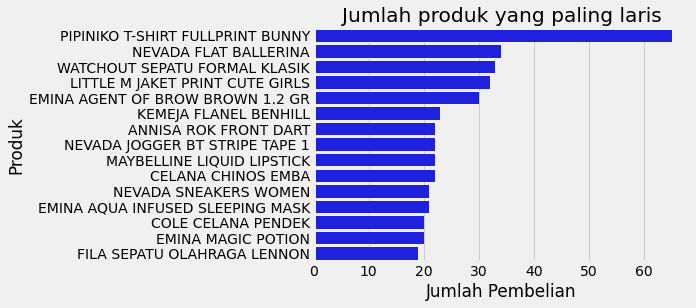

In [12]:
### 15 produk yang paling banyak dijual:
sns.barplot(x='Jumlah Pembelian',y='Produk',data=produk_paling_banyak_dijual[:15],color="blue")
plt.xlabel("Jumlah Pembelian")
plt.ylabel("Produk")
plt.title("Jumlah produk yang paling laris")
plt.xticks(rotation='horizontal')
plt.show()

#### > jadi dari diagram tersebut dapat disimpulkan bahwa jumlah produk paling laris yaitu pipiniko T-shirt fullprint bunny, dengan total pembelian diatas 60

In [13]:
df['Kota'].value_counts()

Surabaya        15
Trenggalek       6
Mojokerto        5
Sidoarjo         5
Ngawi            4
Pare             4
Pasuruan         3
Wonosobo         3
Sragen           3
Jombang          3
Gresik           3
Lamongan         2
Madiun           2
Pandaan          2
Tulungangung     1
Kediri           1
Surakarta        1
Name: Kota, dtype: int64

In [14]:
#menghitung jumlah pembelian paling banyak berdasarkan kota
produk_paling_banyak_dijual_perkota = df[['Kota', 'Customer']].groupby(['Kota']).count().sort_values(by='Customer',ascending=False).reset_index()
produk_paling_banyak_dijual_perkota.head()

,Kota,Customer
0,Surabaya,15
1,Trenggalek,6
2,Mojokerto,5
3,Sidoarjo,5
4,Pare,4


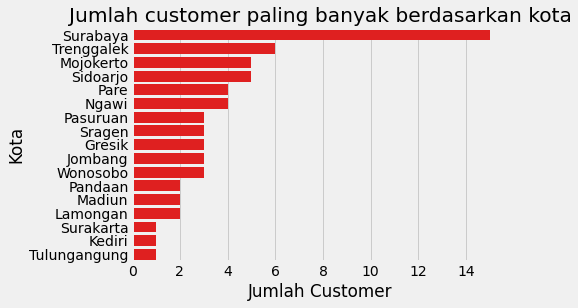

In [15]:
### 17 kota dengan pembelian paling banyak:
sns.barplot(x='Customer',y='Kota',data=produk_paling_banyak_dijual_perkota[:17],color="red")
plt.xlabel("Jumlah Customer")
plt.ylabel("Kota")
plt.title("Jumlah customer paling banyak berdasarkan kota")
plt.xticks(rotation='horizontal')
plt.show()

#### > dari diagram diatas dapat disimpulkan bahwa jumlah customer terbanyak yang melakukan pembelian yaitu pada kota surabaya dengan total customer sebanyak 15 customer, disusul dengan kota trenggalek dengan 6 customer

In [16]:
df_groupby_kota = df[['Kota', 'Jumlah Pembelian']]
df_groupby_kota.head()

,Kota,Jumlah Pembelian
0,Surabaya,10
1,Surabaya,23
2,Surabaya,22
3,Surabaya,13
4,Surabaya,5


In [20]:
#rata-rata jumlah pembelian per-kota
df_groupby_kota = df_groupby_kota.groupby(['Kota']).mean()
df_groupby_kota.head()

,Jumlah Pembelian
Kota,
Gresik,7.666667
Jombang,17.666667
Kediri,11.000000
Lamongan,22.500000
Madiun,19.500000


#### > Tabel diatas menyimpulkan data dari rata-rata jumlah pembelian dari setiap kota